In [1]:
import moxing as mox

INFO:root:Using MoXing-v2.1.0.5d9c87c8-5d9c87c8
INFO:root:Using OBS-Python-SDK-3.20.9.1


In [2]:
!mkdir ./dsdp/blind_docking

mkdir: cannot create directory ‘./dsdp/blind_docking’: File exists


In [3]:
!mkdir ./dsdp/redocking

mkdir: cannot create directory ‘./dsdp/redocking’: File exists


In [4]:
!mkdir ./dsdp/examples

mkdir: cannot create directory ‘./dsdp/examples’: File exists


In [5]:
mox.file.copy_parallel('obs://dsdp/blind_docking', './dsdp/blind_docking')

In [6]:
mox.file.copy_parallel('obs://dsdp/redocking', './dsdp/redocking')

In [7]:
mox.file.copy_parallel('obs://dsdp/examples', './dsdp/examples')

In [8]:
#compiling redocking
! cd ./dsdp/redocking/;make

nvcc -o main_SingleRun.o -c main_SingleRun.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o common.o -c common.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
common.cu(204): warning: missing return statement at end of non-void function "Vina_Covalent_Radius"

common.cu(204): warning: missing return statement at end of non-void function "Vina_Covalent_Radius"

nvcc -o Copy_pdbqt_Format.o -c Copy_pdbqt_Format.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o DSDP_Sort.o -c DSDP_Sort.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o DSDP_Task.o -c DSDP_Task.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o Kernel.o -c Kernel.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
Kernel.cu(962): warning: variable "dd" was declared but never referenced

Kernel.cu(96

In [9]:
#compiling blind docking
! cd ./dsdp/blind_docking/;make

nvcc -o main_SingleRun_SitePointStart.o -c main_SingleRun_SitePointStart.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o common.o -c common.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
common.cu(204): warning: missing return statement at end of non-void function "Vina_Covalent_Radius"

common.cu(204): warning: missing return statement at end of non-void function "Vina_Covalent_Radius"

nvcc -o CLUSTER.o -c CLUSTER.cpp -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o Copy_pdbqt_Format.o -c Copy_pdbqt_Format.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o DSDP_Sort.o -c DSDP_Sort.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o DSDP_Task.o -c DSDP_Task.cu -arch=sm_60 -rdc=true -lcudadevrt -lcufft --use_fast_math -O4 -std=c++11 -lgomp
nvcc -o Kernel.o -c Kernel.cu -arch=sm_60 -rdc=true -

In [10]:
#run redocking
!cd ./dsdp/examples/redocking/;bash run.sh

size of protein mesh 288000000
./1a2b/1a2b_ligand.pdbqt
Total time 0.826231 s
size of protein mesh 288000000
./1a80/1a80_ligand.pdbqt
Total time 1.150517 s
size of protein mesh 288000000
./1a8p/1a8p_ligand.pdbqt
Total time 1.103487 s
size of protein mesh 288000000
./1a8r/1a8r_ligand.pdbqt
Total time 0.846814 s
size of protein mesh 288000000
./1aa6/1aa6_ligand.pdbqt
Total time 1.251923 s


In [11]:
#run blind docking
!cd ./dsdp/examples/blind_docking/;bash run.sh

size of protein mesh 288000000
./1a2b/1a2b.npy
Total time 0.876729 s
size of protein mesh 288000000
./1a80/1a80.npy
Total time 1.228387 s
size of protein mesh 288000000
./1a8p/1a8p.npy
Total time 1.143475 s
size of protein mesh 288000000
./1a8r/1a8r.npy
size of protein mesh 288000000
./1a8r/1a8r.npy
Total time 1.815347 s
size of protein mesh 288000000
./1aa6/1aa6.npy
size of protein mesh 288000000
./1aa6/1aa6.npy
size of protein mesh 288000000
./1aa6/1aa6.npy
Total time 3.482611 s


In [12]:
#run virtual screening
!cd ./dsdp/examples/virtual_screening/;bash run.sh

size of protein mesh 288000000
./ligand/actives_1.pdbqt
Total time 0.744650 s
size of protein mesh 288000000
./ligand/actives_2.pdbqt
Total time 0.695518 s
size of protein mesh 288000000
./ligand/actives_3.pdbqt
Total time 0.884762 s
size of protein mesh 288000000
./ligand/actives_4.pdbqt
Total time 0.889508 s
size of protein mesh 288000000
./ligand/actives_5.pdbqt
Total time 0.676559 s
size of protein mesh 288000000
./ligand/decoys_10.pdbqt
Total time 0.717411 s
size of protein mesh 288000000
./ligand/decoys_11.pdbqt
Total time 0.697610 s
size of protein mesh 288000000
./ligand/decoys_12.pdbqt
Total time 0.687725 s
size of protein mesh 288000000
./ligand/decoys_13.pdbqt
Total time 0.668052 s
size of protein mesh 288000000
./ligand/decoys_14.pdbqt
Total time 0.687609 s
size of protein mesh 288000000
./ligand/decoys_15.pdbqt
Total time 0.676188 s
size of protein mesh 288000000
./ligand/decoys_16.pdbqt
Total time 0.744717 s
size of protein mesh 288000000
./ligand/decoys_17.pdbqt
Total ti

In [13]:
#estimate RMSD
import numpy as np


def crd_from_pdbqt(sdf):
    crds = []
    with open(sdf, "r") as sdfile:
        input_info = sdfile.readlines()

    for inline in input_info:
        if len(inline) >= 70 and len(inline) <= 100 and ("H" not in inline[30:80]):
            line_info = inline.strip()
            crd_info = np.array([float(line_info[30:38]), float(line_info[38:46]), float(line_info[46:54])])
            crds.append(crd_info)
        else:
            continue
    return np.stack(crds)

def calculate_center(ligand):
    point_map = ligand
    point_center = point_map.mean(axis=0)
    return point_center

def calculate_distance(ligand, site):
    ligand_x = ligand[0]
    ligand_y = ligand[1]
    ligand_z = ligand[2]
    site_x = site[0]
    site_y = site[1]
    site_z = site[2]

    distance = pow(pow(site_x-ligand_x, 2) + pow(site_y-ligand_y, 2) + pow(site_z-ligand_z, 2), 0.5)
    return distance

dist_dict = {"RMSD":{}, "MAE":{}, "Cent_dis":{}}

with open('./dsdp/examples/blind_docking/list.txt') as list_f:
    lines = list_f.readlines()

for line in lines:
    line = line.strip()
    ref_file = "./dsdp/examples/blind_docking/" + line + '/' + line + '_ligand.pdbqt'
    dock_file = "./dsdp/examples/blind_docking/" + line + '/' + line + '_out.pdbqt'

    ref_crds = crd_from_pdbqt(ref_file)
    dock_crds = crd_from_pdbqt(dock_file)
    ref_center = calculate_center(ref_crds)
    dock_center = calculate_center(dock_crds)
    ref_dock_distance = calculate_distance(ref_center, dock_center)
    dist2_matrix = np.power(ref_crds - dock_crds, 2)
    rmsd = np.sqrt(3 * dist2_matrix.flatten().mean())
    mae = np.sqrt(dist2_matrix.sum(axis=1)).mean()
    print("RMSD of " + line + " is : " + str(rmsd))



RMSD of 1a2b is : 2.3137217515833655
RMSD of 1a80 is : 3.162129250336446
RMSD of 1a8p is : 9.893377644037813
RMSD of 1a8r is : 1.7093600684905446
RMSD of 1aa6 is : 17.86585609360623


In [14]:
import os
import re

def extract_numbers(text):
    return float(re.findall(r'-\d+\.\d+', text)[0])

log_files_directory = './dsdp/examples/virtual_screening/ligand'
scores = []
labels = []

for filename in os.listdir(log_files_directory):
    if filename.endswith('.log'):
        file_path = os.path.join(log_files_directory, filename)
        labels.append(filename[0] == 'd')
        with open(file_path, 'r') as file:
            content = file.read()
            numbers = extract_numbers(content)
            scores.append(numbers)

print(sorted(scores))

[-9.869795, -9.516343, -7.949355, -7.816128, -7.590895, -7.171757, -6.980979, -6.884938, -6.76096, -6.689533, -6.622147, -6.604807, -6.561749, -6.461029, -6.460969, -6.361613, -6.287854, -6.252217, -5.990596, -5.840154, -5.726468, -5.648844, -4.933323, -4.842063, -4.571979]


In [15]:
from mindspore.nn import ROC, auc

metric = ROC()
metric.clear()
metric.update(scores, labels)
fpr, tpr, thre = metric.eval()
area_under_curve = auc(fpr, tpr)
area_under_curve

0.9299999999999999

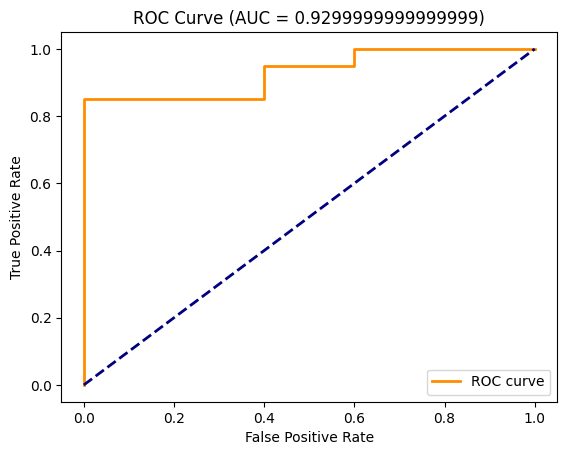

In [16]:
from matplotlib import pyplot as plt

plt.title(f"ROC Curve (AUC = {area_under_curve})")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.savefig("roc_curve.png")

plt.show()